In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# import cartopy.feature as cft

## Load GLORYS data
Lives at `/g/data/jk72/mxr581/SOTS-project-data/glorys/`.
File `glorys_subset_monthly.nc` has monthly data for 2010--2025 for the area bounded by (minimum longitude = 130.76, maximum longitude = 158.24 , minimum latitude = -55.24, maximum latitude = -29.76)

| Variable Name | Description                                   |
|---------------|-----------------------------------------------|
| so            | Salinity (PSU)      |
| thetao        | Potential temperature (degrees C)          |
| uo            | Zonal (east-west) velocity (m/s)         |
| vo            | Meridional (north-south) velocity (m/s)    |
| zos           | Sea surface height above geoid    (m)           |


In [22]:
# ## Merge the two netcdf files covering different periods
# # Load years 2010-2021
# file = '/g/data/jk72/mxr581/SOTS-project-data/glorys/glorys_subset_monthly.nc'
# da = xr.open_dataset(file)

# # Load interim years 2021-2025
# file = '/g/data/jk72/mxr581/SOTS-project-data/glorys/glorys_subset_monthly_interim.nc'
# da_int = xr.open_dataset(file)

# # Concatenate along the 'time' dimension
# da_merged = xr.concat([da, da_int], dim='time')

# # save merged dataset
# da_merged.to_netcdf('/g/data/jk72/mxr581/SOTS-project-data/glorys/glorys_subset_monthly_merged.nc')

In [23]:
file = '/g/data/jk72/mxr581/SOTS-project-data/glorys/glorys_subset_monthly_merged.nc'
da = xr.open_dataset(file)

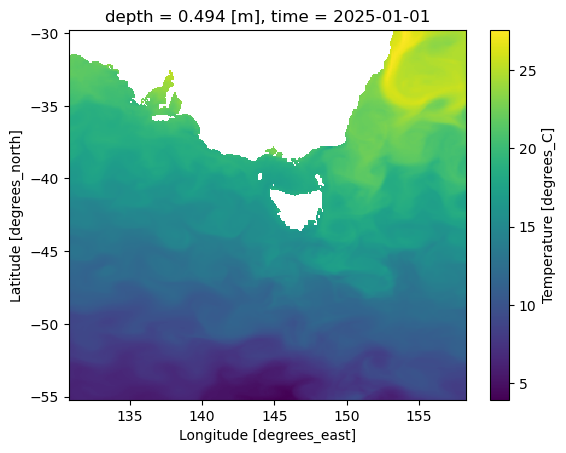

In [24]:
# test plot
SST_snapshot = da.thetao.isel(time=-1).sel(depth = 0.5, method = 'nearest')
SST_snapshot.plot()

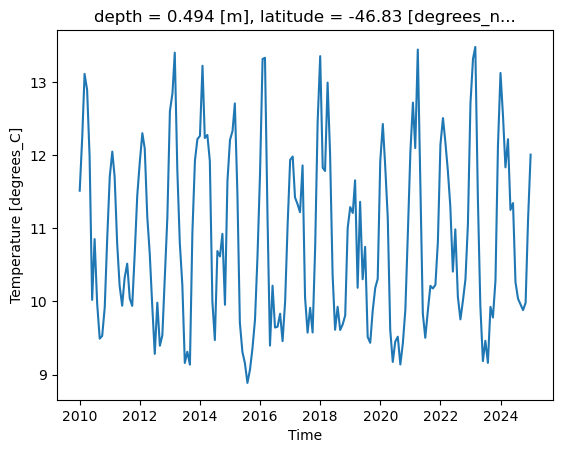

In [25]:
# plot SST timeseries
lat_SOTS = -46.8
lon_SOTS = 142
SST_SOTS = da.thetao.sel(depth = 0.5, latitude = lat_SOTS, longitude = lon_SOTS, method = 'nearest')
SST_SOTS.plot()

## Load the SOTS/SOFS data and plot

In [26]:
directory = '/g/data/jk72/mxr581/SOTS-project-data/sots/flux/'
file = 'IMOS_DWM-SOTS_CFMST_20210420Z_SOFS_FV02_SOFS-10-2021-Surface-Flux_END-20220512Z_C-20230516Z.nc' # data from 2021/2022
dflux = xr.open_dataset(directory + file)

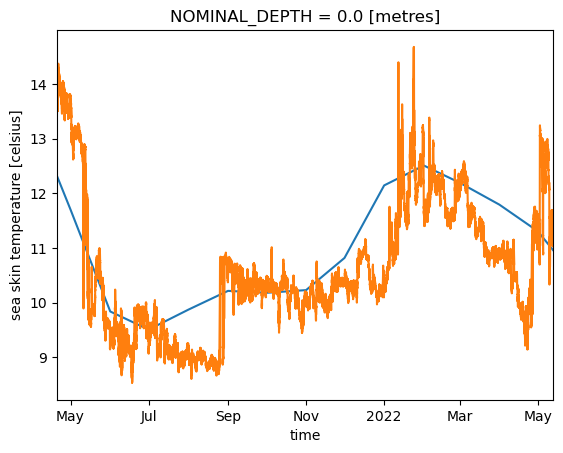

In [27]:
# Plot sea surface temperature and compare to glorys
SST_SOTS.plot(label = 'glorys monthly')
dflux.SST.plot(xlim = [dflux.TIME[1], dflux.TIME[-1]], label = 'SOFS')